<center style="font-size : 100px">  <h1>Deep learning</h1>  </center>

**Deep learning Libs:**

1. Tensorflow ( Google )
2. Pytorch  ( Facebook )
3. Keras
4. Caffe
5. JAX ( JavaScript )
6. CNTK
7. ONNX
8. FastAI

**We will be Using Tensroflow, why?**

1. Easy to integrate ( mobile app, web application, embedded system )
2. Could be converted to multiple formats ( tflite -to work on smartphones, tfjs )
3. Work in the background using C++
4. Open source, frequently updated by Google, Customizable


**Keras** <br>
an interface ( enable us to write simpler code ), work as a wrapper: tf, pytorch, CNTK

**Activation functions**

1. Sigmoid
2. Relu
3. Tanh
4. Softmax
5. Leaky Relu  

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

![image info](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)  

<h4 style="color:purple">Load the dataset</h4>

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
total_pixels = 32*32*3
total_pixels

3072

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

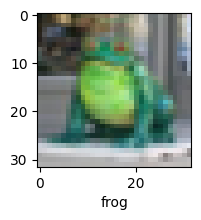

In [ ]:
plot_sample(X_train, y_train, 19)

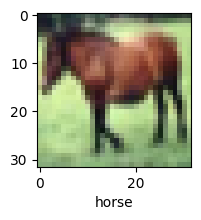

In [ ]:
plot_sample(X_train, y_train, 7)

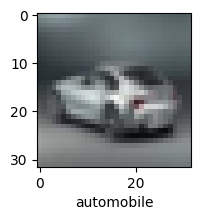

In [ ]:
plot_sample(X_train, y_train, 250)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
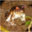

In [ ]:
X_train[0]

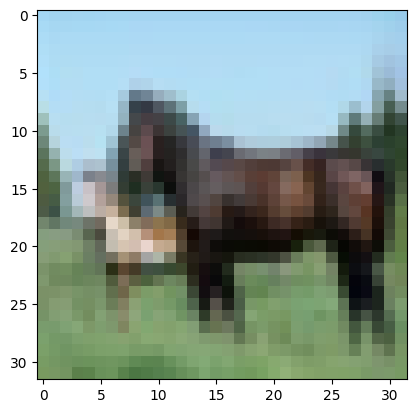

In [ ]:
plt.imshow(X_train[12])

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

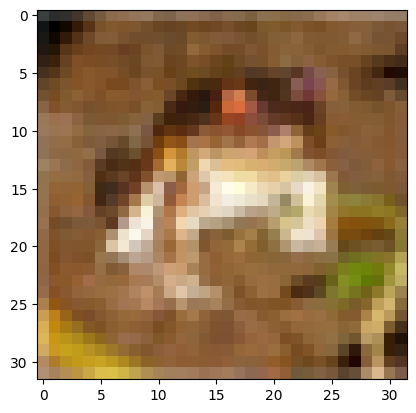

In [ ]:
plt.imshow(X_train[0])

## ANN

In [ ]:
newann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(500, activation='relu'),
        layers.Dense(400, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
newann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
newann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2817 - loss: 2.0078
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3939 - loss: 1.6853
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4217 - loss: 1.6128
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4439 - loss: 1.5504
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4557 - loss: 1.5228
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4698 - loss: 1.4795
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4857 - loss: 1.4506
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4851 - loss: 1.4331
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4951 - loss: 1.4082
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5005 - loss: 1.3936


In [ ]:
newann.evaluate(X_test, y_test) # retun loss and accuracy of test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4633 - loss: 1.5151


[1.5222392082214355, 0.45660001039505005]

In [ ]:
results = newann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
results[0]

array([0.03756769, 0.02920379, 0.04179069, 0.24530578, 0.07721084,
       0.24295282, 0.070022  , 0.00623461, 0.23648612, 0.01322572],
      dtype=float32)

In [ ]:
sum(results[0])

1.0000000428408384

In [ ]:
modelprediction = np.argmax(results[0])
modelprediction

3

In [ ]:
actual_value = y_test[0]
actual_value

3

In [ ]:
newann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(500, activation='relu'),
        layers.Dense(400, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

newann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

newann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2888 - loss: 1.9676
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4005 - loss: 1.6779
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4366 - loss: 1.6006
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4572 - loss: 1.5329
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4744 - loss: 1.4878
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4863 - loss: 1.4427
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5007 - loss: 1.4060
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5130 - loss: 1.3762
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5290 - loss: 1.3397
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5401 - loss: 1.3130


In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(120, activation='relu'),
        layers.Dense(40, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2724 - loss: 2.0196
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3705 - loss: 1.7471
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4026 - loss: 1.6686
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4206 - loss: 1.6236
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4365 - loss: 1.5828
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4478 - loss: 1.5484
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4583 - loss: 1.5315
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4618 - loss: 1.5194
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4675 - loss: 1.4986
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4691 - loss: 1.4924


In [ ]:
ann.evaluate(X_test, y_test) # retun loss and accuracy of test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4623 - loss: 1.5154


[1.52223539352417, 0.46070000529289246]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(y_pred_classes[0:5] , y_test[0:5])

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3, 8, 8, 8, 4] [3 8 8 0 6]
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.52      0.50      1000
           1       0.60      0.53      0.56      1000
           2       0.39      0.25      0.30      1000
           3       0.32      0.39      0.35      1000
           4       0.45      0.27      0.34      1000
           5       0.53      0.18      0.26      1000
           6       0.46      0.58      0.51      1000
           7       0.43      0.58      0.50      1000
           8       0.49      0.74      0.59      1000
           9       0.50      0.56      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.45     10000
weighted avg       0.47      0.46      0.45     10000



**Optimizers:** <br>
adam, adamax, adamw, gd, sgd, rms prop

**Loss**
<br>
called error function ( calculate error value )
<br>goal : loss ≈ 0

<br>

**HyperParameters**

1. Number of neuron in the hidden layer
2. Number of hidden layers
3. Number of epochs
1. Batch Size
2. Steps Per Epoch
3. Early Stop
4. Learning Rate



**Differ from problem to another:**
<br>
1. Classification ( binary classification, multi classification )                            
2. Regression                                    
3. Clustering                          

In [ ]:
# prompt: create the same ann above but with early stop

from tensorflow.keras.callbacks import EarlyStopping

# ... (Your existing code) ...

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ... (Your model definition and compilation) ...

# Train the model with early stopping
history = ann.fit(X_train, y_train, epochs=5, validation_split=0.1, callbacks=[early_stopping])


# ... (Rest of your code) ...


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4408 - loss: 1.5668 - val_accuracy: 0.4390 - val_loss: 1.5900
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4464 - loss: 1.5426 - val_accuracy: 0.4430 - val_loss: 1.5666
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4564 - loss: 1.5313 - val_accuracy: 0.4404 - val_loss: 1.5636
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4592 - loss: 1.5078 - val_accuracy: 0.4498 - val_loss: 1.5562
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.4637 - loss: 1.5019 - val_accuracy: 0.4442 - val_loss: 1.5575
